In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
X, y = make_moons(n_samples=30000, noise=0.08, random_state=42)
X, y

(array([[ 0.95115895,  0.59748855],
        [ 0.96293465, -0.51796829],
        [ 1.084162  , -0.39532277],
        ...,
        [ 0.93711847,  0.23832651],
        [-0.02429623,  0.27347678],
        [ 1.23238583, -0.34439684]]),
 array([0, 1, 1, ..., 0, 1, 1]))

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [5]:
dbscan = DBSCAN(eps=0.1, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

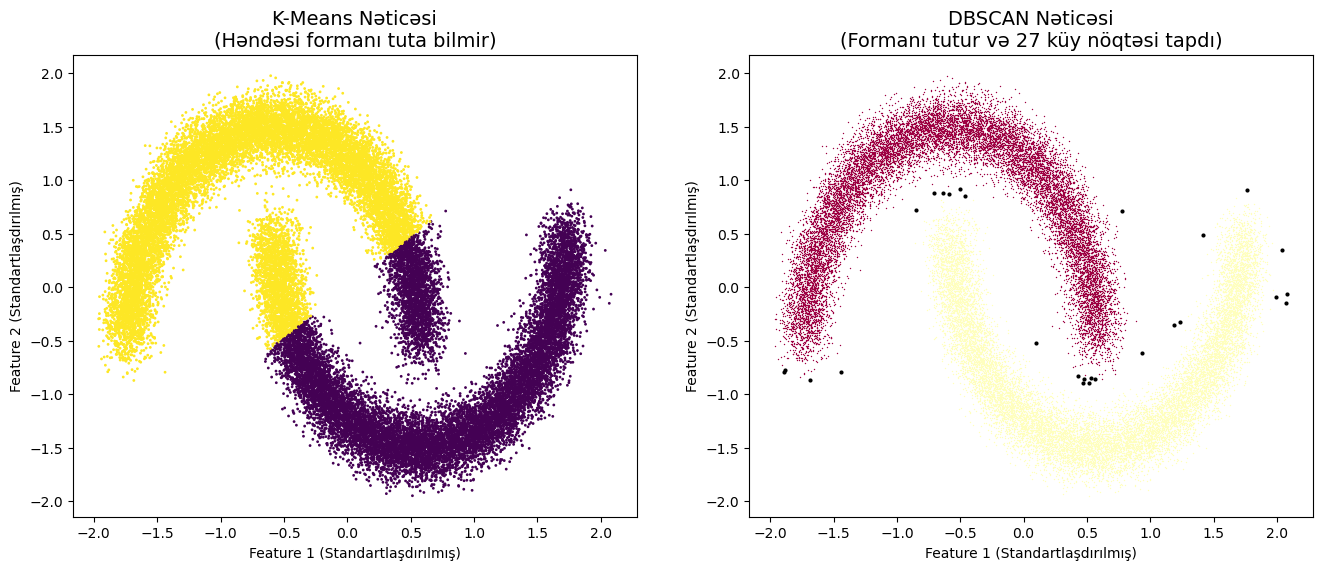

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, s=1, cmap='viridis')
ax1.set_title("K-Means Nəticəsi\n(Həndəsi formanı tuta bilmir)", fontsize=14)
ax1.set_xlabel("Feature 1 (Standartlaşdırılmış)")
ax1.set_ylabel("Feature 2 (Standartlaşdırılmış)")

unique_labels = set(dbscan_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1] 
        label_name = "Küy (Noise)"
        marker_size = 3
    else:
        label_name = f"Cluster {k}"
        marker_size = 1

    class_member_mask = (dbscan_labels == k)
    
    xy = X_scaled[class_member_mask]
    ax2.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='none', markersize=marker_size)

ax2.set_title(f"DBSCAN Nəticəsi\n(Formanı tutur və {list(dbscan_labels).count(-1)} küy nöqtəsi tapdı)", fontsize=14)
ax2.set_xlabel("Feature 1 (Standartlaşdırılmış)")
ax2.set_ylabel("Feature 2 (Standartlaşdırılmış)")

plt.show()

In [7]:
from sklearn.datasets import fetch_california_housing

In [8]:
data = fetch_california_housing()
X = data.data

In [9]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [10]:
coords = X[:, -2:]  # Latitude, Longitude

In [11]:
coords_radians = np.radians(coords)

In [12]:
kms_per_radian = 6371.0088

In [13]:
epsilon_km = 5 
epsilon_radians = epsilon_km / kms_per_radian

In [14]:
db = DBSCAN(eps=epsilon_radians, min_samples=20, metric='haversine', algorithm='ball_tree')
db.fit(coords_radians)

DBSCAN(algorithm='ball_tree', eps=0.0007848050688613081, metric='haversine',
       min_samples=20)

In [15]:
cluster_labels = db.labels_
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)


Nəticələr:
Tapılan Klasterlər (Şəhər/Bölgə mərkəzləri): 55
Küy (Noise) nöqtələri (Tənha evlər): 2961


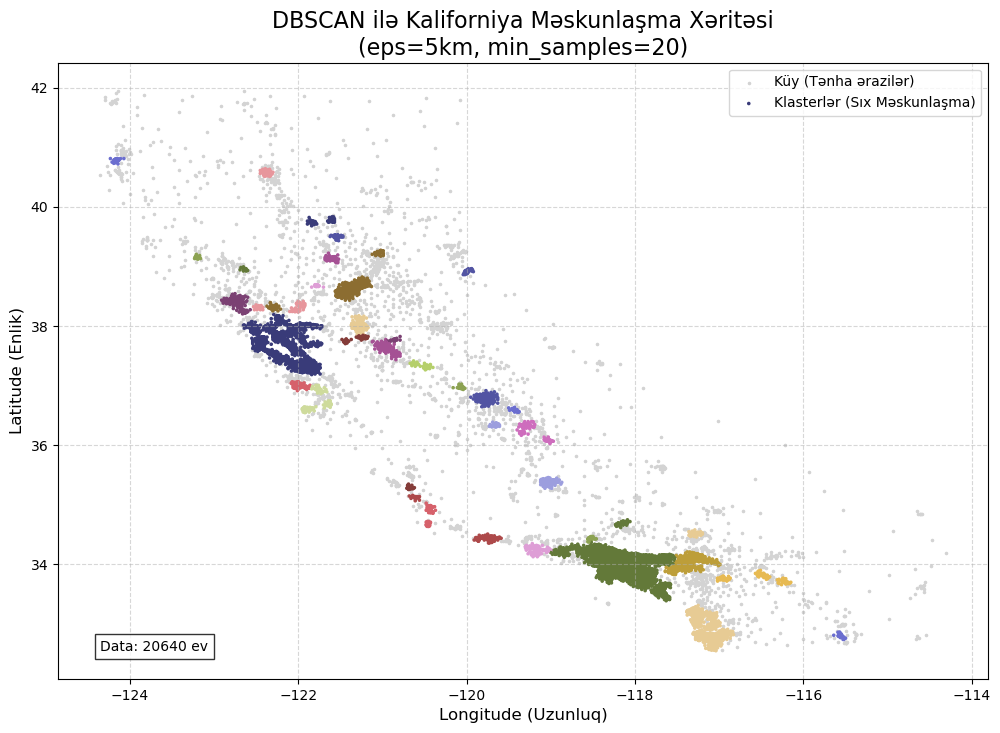

In [16]:
print(f"\nNəticələr:")
print(f"Tapılan Klasterlər (Şəhər/Bölgə mərkəzləri): {n_clusters}")
print(f"Küy (Noise) nöqtələri (Tənha evlər): {n_noise}")

plt.figure(figsize=(12, 8))

plt.scatter(coords[cluster_labels == -1, 1], coords[cluster_labels == -1, 0], 
            c='lightgray', marker='.', s=10, label='Küy (Tənha ərazilər)')

plt.scatter(coords[cluster_labels != -1, 1], coords[cluster_labels != -1, 0], 
            c=cluster_labels[cluster_labels != -1], cmap='tab20b', marker='.', s=10, label='Klasterlər (Sıx Məskunlaşma)')

plt.title(f"DBSCAN ilə Kaliforniya Məskunlaşma Xəritəsi\n(eps={epsilon_km}km, min_samples=20)", fontsize=16)
plt.xlabel("Longitude (Uzunluq)", fontsize=12)
plt.ylabel("Latitude (Enlik)", fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.text(coords[:, 1].min(), coords[:, 0].min(), 
         f"Data: {len(coords)} ev", 
         fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.show()